# Kernal For House price prediction

In [2]:
# importing necesssary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error , accuracy_score,r2_score
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

## Step-1 : Loading the dataset unsing pandas

In [12]:
data = pd.read_csv('D:/kaggle/house-prices-advanced-regression-techniques/train.csv')

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
data.shape

(1460, 81)

## Step-2: Checking Null-values and finding percentage of that

In [15]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False)[:20]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [16]:
list(((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False).index[:20])

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical',
 'Utilities']

### Drop the columns which null-value percentage is greater than 6%

In [17]:
data.drop(columns=['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'LotFrontage'],inplace = True)

In [18]:
(((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False)[:20] !=0).value_counts()

True     13
False     7
dtype: int64

In [19]:
list(((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False).index[:13])

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'MasVnrArea',
 'Electrical']

### Selecting columns for treating the null-value or missing value with basic technique 

In [20]:
data.loc[:,['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'MasVnrArea',
 'Electrical']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageCond      1379 non-null object
GarageQual      1379 non-null object
BsmtExposure    1422 non-null object
BsmtFinType2    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtCond        1423 non-null object
BsmtQual        1423 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
Electrical      1459 non-null object
dtypes: float64(2), object(11)
memory usage: 148.4+ KB


In [23]:
# counting the object datatype columns and numeric datatype columns and selecting that

data1=data.loc[:,['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'MasVnrArea',
 'Electrical']]
data1.dtypes.value_counts()

object     11
float64     2
dtype: int64

In [24]:
data1.dtypes[:].sort_values(ascending = False)

Electrical       object
MasVnrType       object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
BsmtFinType2     object
BsmtExposure     object
GarageQual       object
GarageCond       object
GarageFinish     object
GarageType       object
MasVnrArea      float64
GarageYrBlt     float64
dtype: object

In [25]:
list(data1.dtypes[:].sort_values(ascending = False).index)

['Electrical',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'GarageType',
 'MasVnrArea',
 'GarageYrBlt']

In [26]:
# filling numeric columns according to the given data

data.MasVnrArea.fillna(value = np.mean(data.MasVnrArea),inplace = True)
data.GarageYrBlt.fillna(method = 'ffill',inplace = True)

In [27]:
# Selected the column names for objective data types

obj_type_list=['Electrical',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'GarageType']

In [28]:
# counting and replceing the caterogical columns data according to max count

replace_list=[]
for i in obj_type_list:
    print(i)
    print(data[i].value_counts())
    replace_list.append(data[i].value_counts().index[0])
    print()
    
print(replace_list)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

GarageFinish
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

GarageType
Attchd     870
D

In [29]:
for i in range(len(obj_type_list)):
    data[obj_type_list[i]].replace(to_replace = np.nan, value = replace_list[i] ,inplace = True )

In [30]:
data.dtypes.sort_values(ascending=False).value_counts()

object     38
int64      35
float64     2
dtype: int64

In [31]:
new_obj_data=data.select_dtypes(include='object')
new_obj_data.dtypes.value_counts()

object    38
dtype: int64

### Converting all object datatypes into numeric data 

In [32]:
# selecting the object column index and putting them into a list

enc_obj = list(data.dtypes.sort_values(ascending=False).index[:38])

In [33]:
# transform the data from string to numeric

enc = LabelEncoder()
for i in enc_obj:
    data[i]=enc.fit_transform(data[i])

### Checking the correlation of data according to the target variable

In [34]:
data_corr = data.corr()
abs(data_corr['SalePrice'].sort_values(ascending = False))[:20]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
Fireplaces      0.466929
GarageYrBlt     0.454619
BsmtFinSF1      0.386420
Foundation      0.382479
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

## Step-3: Selecting the data columns for modeling 

In [43]:
model_data = data.loc[:,['OverallQual',
'GrLivArea',    
'GarageArea',   
'TotalBsmtSF',            
'FullBath',      
'YearBuilt',
'YearRemodAdd',
'SalePrice']]

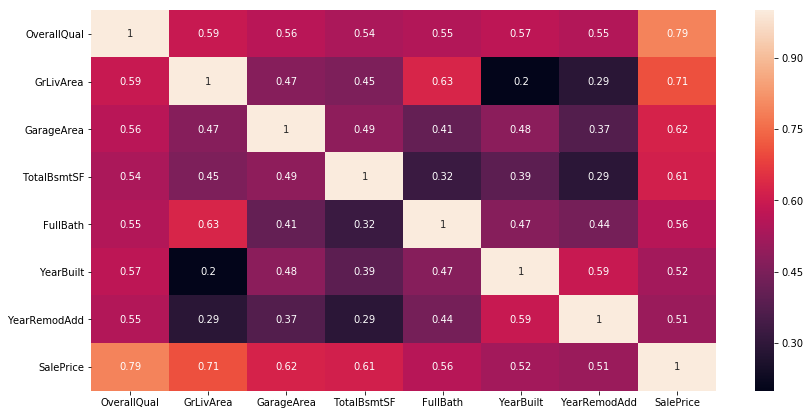

In [44]:
plt.figure(figsize=(14,7))
sns.heatmap(model_data.corr(),annot=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


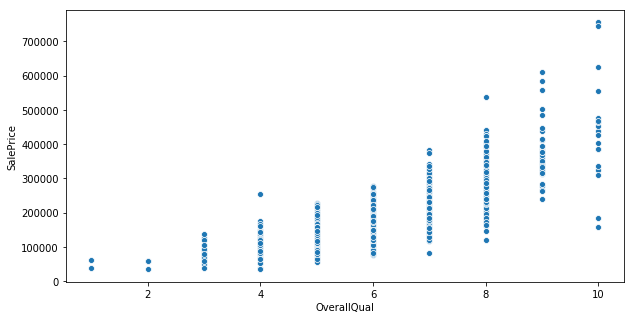

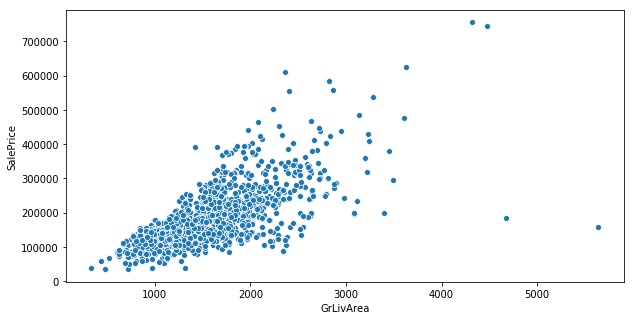

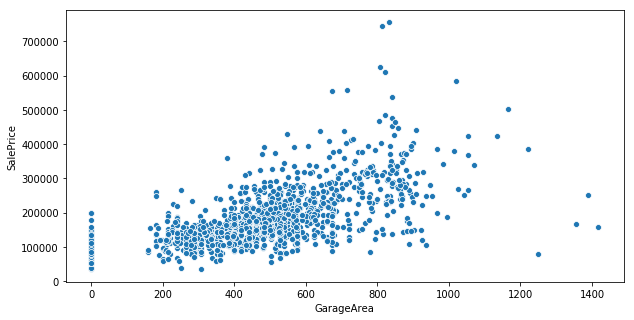

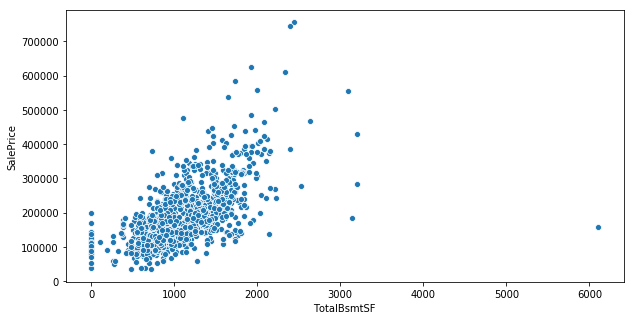

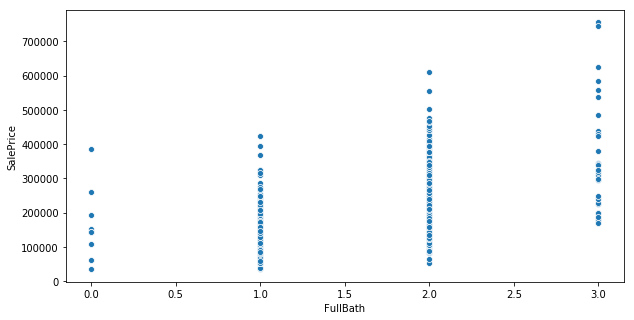

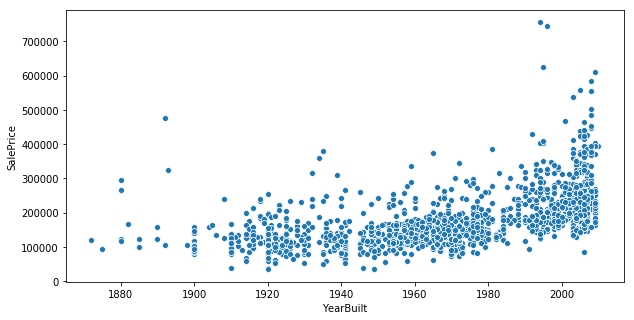

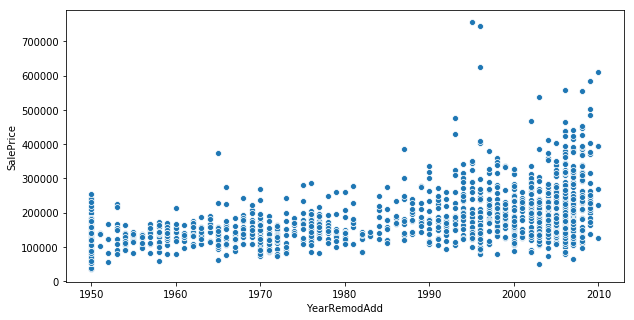

In [45]:
# usinng scatterplot to remove outliers

norm_plot=list(model_data.columns[:-1])
for i in norm_plot:
    plt.figure(figsize=(10,5))
    print(sns.scatterplot(x=model_data[i],y=model_data.SalePrice))

In [46]:
# Selectong the row numbers having outliers and putting them into a list

drop_index_row=(list(model_data.loc[model_data.TotalBsmtSF > 3000,'TotalBsmtSF'].index)
                +list(model_data.loc[model_data.GrLivArea > 4000,'GrLivArea'].index)
                +list(model_data.loc[model_data.GarageArea > 1200,'GarageArea'].index))
drop_index_row=pd.Series(data=drop_index_row).unique()

In [47]:
# Droping the rows having outliers 

for i in drop_index_row:
    model_data.drop(index=i,inplace = True,axis = 0)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


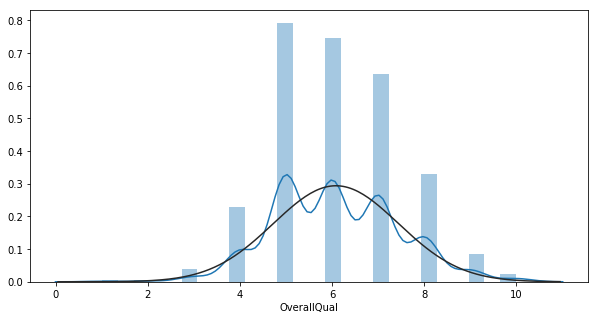

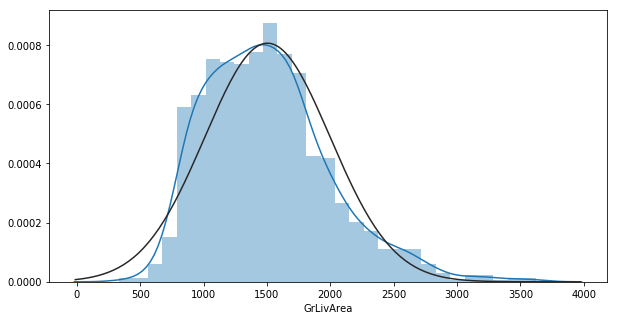

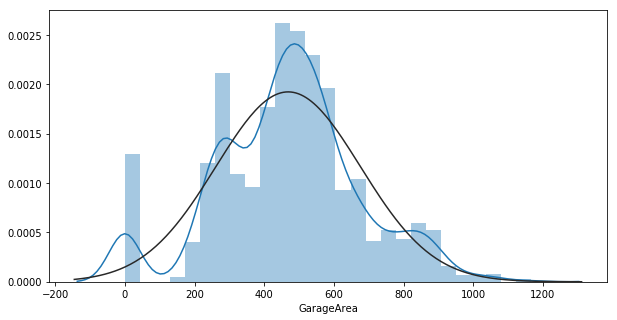

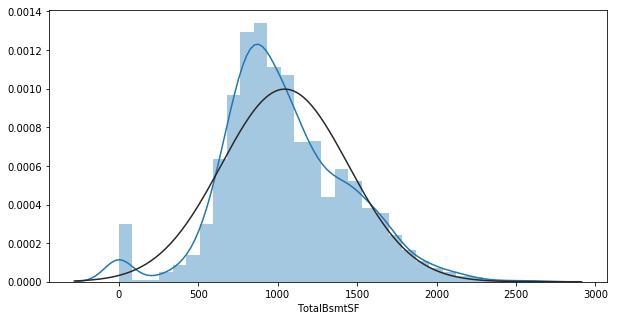

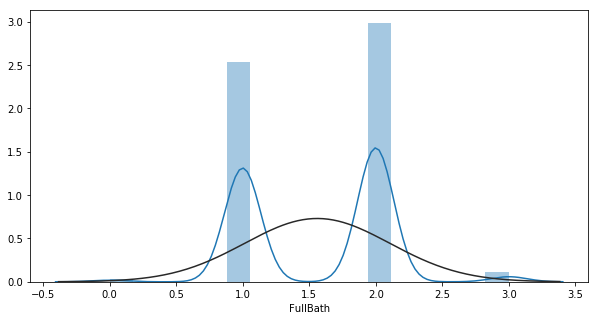

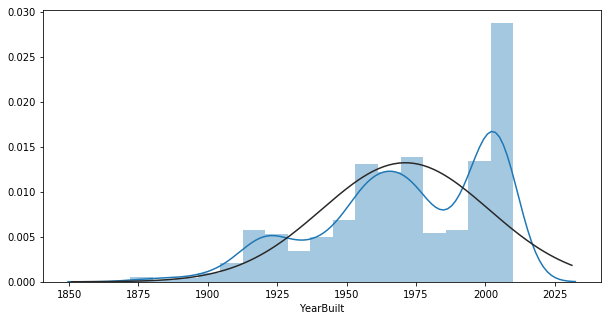

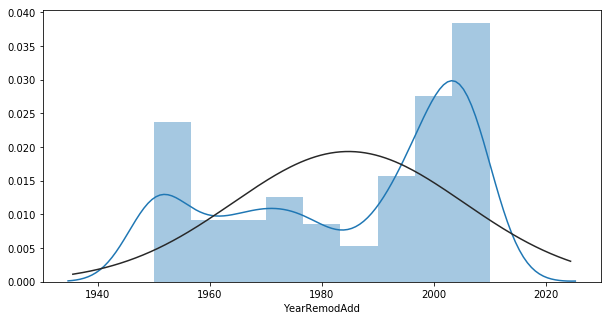

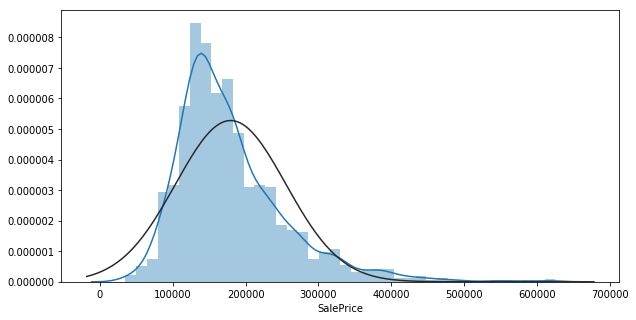

In [48]:
# ploting the datd to see the normal distribution

norm_plot=list(model_data.columns)
for i in norm_plot:
    plt.figure(figsize=(10,5))
    print(sns.distplot(a=model_data[i],kde=True,fit=norm))

In [49]:
# Normalze the data to treat skew-ness and kurtosis

model_data1 = model_data
model_data1 = np.log1p(model_data1)

In [50]:
for i in norm_plot:
    model_data1.loc[np.isinf(model_data1[i]) != False,i] = np.mean(model_data1[i])

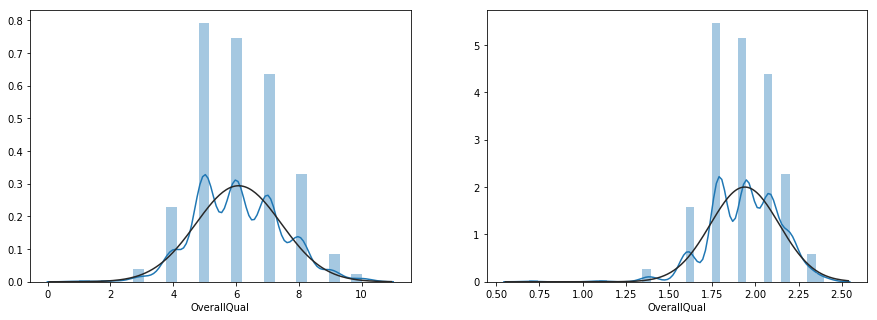

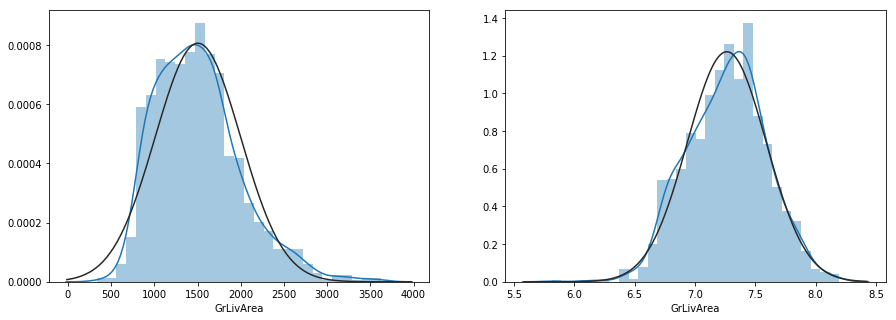

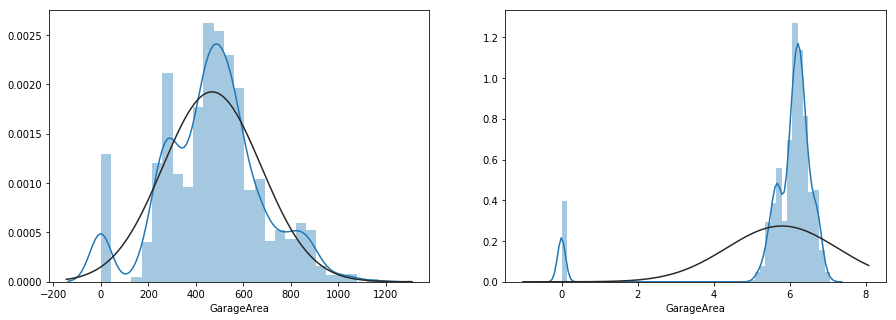

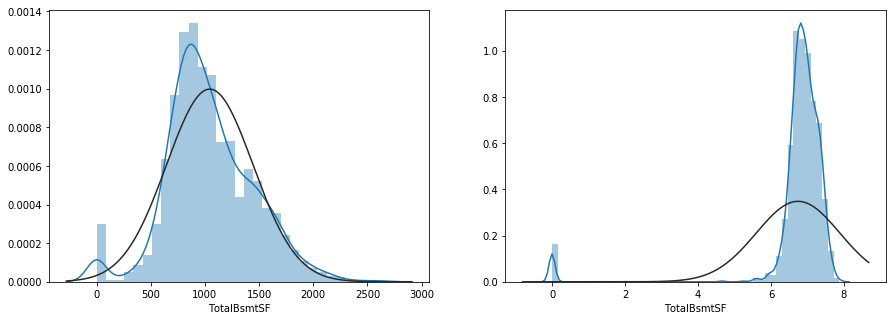

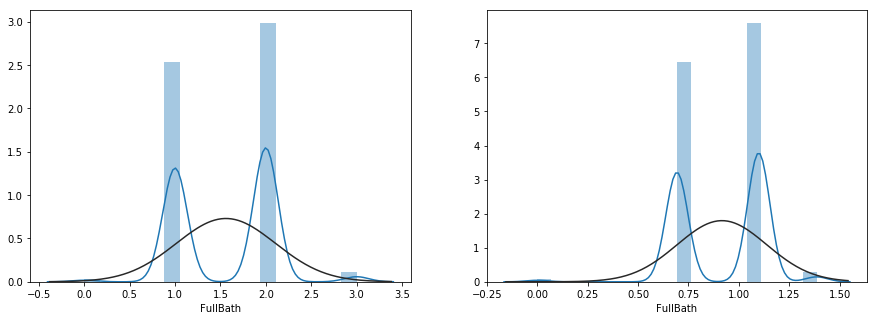

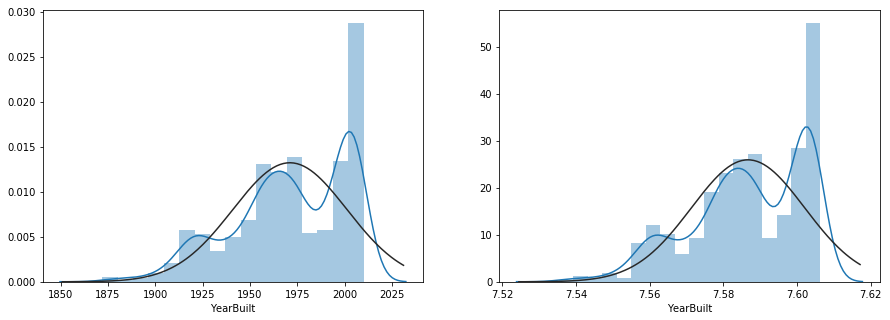

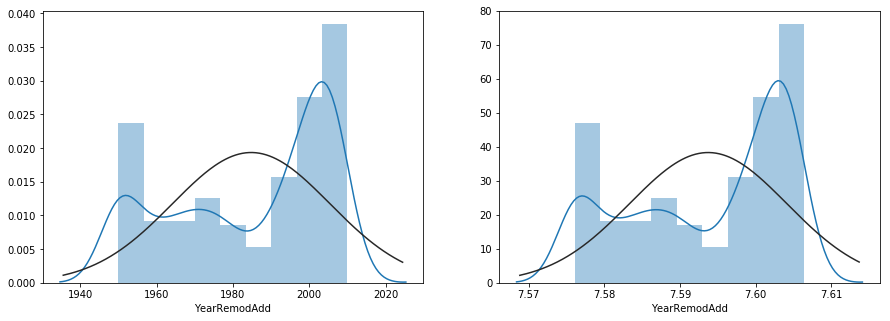

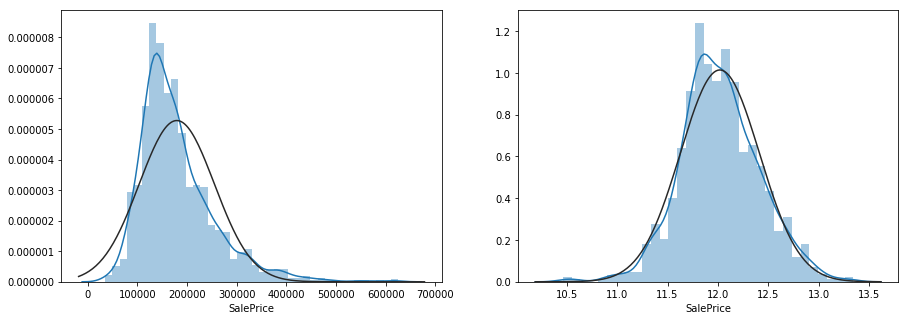

In [51]:
# Compareing original(Left) with Transformation(Right)

for i in norm_plot:    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(a=model_data[i],fit=norm)
    plt.subplot(122)
    sns.distplot(a=model_data1[i],fit=norm)

In [52]:
model_data1.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
0,2.079442,7.444833,6.308098,6.753438,1.098612,7.602900,7.602900,12.247699
1,1.945910,7.141245,6.133398,7.141245,1.098612,7.589336,7.589336,12.109016
2,2.079442,7.488294,6.411818,6.825460,1.098612,7.601902,7.602401,12.317171
3,2.079442,7.448916,6.466145,6.629363,0.693147,7.557995,7.586296,11.849405
4,2.197225,7.695758,6.729824,7.044033,1.098612,7.601402,7.601402,12.429220


## Step-4: Spliting the data to train and test the model

In [68]:
# Spliting into 70% train and 30% test

X=model_data1.iloc[:,:-1]
y=model_data1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Using the LightGBM Regressor model to train and test

In [69]:
# Define model into object

model = LGBMRegressor()

In [70]:
model.fit(X_train,y_train)
ypred=model.predict(X_test)

In [71]:
r2_score(y_test,ypred)

0.8323259189744878

### Using Crossvalidation for the LightGBM Regressor model

In [72]:
model_score = cross_val_score(LGBMRegressor(),X,y=y,cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished


In [73]:
model_score.mean()

0.8346322016175541

### Using crossvalidation for the LightGBM Regressor model with Hyper parameter tunning

In [74]:
model_reg = cross_val_score(LGBMRegressor(boosting_type='gbdt',
                         gamma=0.081334,
                         learning_rate=0.120667,
                         num_estimators=290,
                         max_depth=2),X=X,y=y,cv=5)

print(model_reg.mean())

0.8525257003538786


# This is not final but still improveing 